In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install kaggle

In [ ]:
%cd /content/gdrive/MyDrive/content/sample_data/

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/content/sample_data/'
/content


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/tmp/"

In [ ]:
# jika anda ingin menggunakan kaggle API untuk mengunduh dataset gunakan
# kode berikut untuk membantu anda membuat config kaggle.json
# pastikan anda mendaftar akun kaggle terlebih dahulu
# kemudian menuju halaman my account dan buat token API anda

api_token = {"username":"bibitpamungkas","key":"0b4a500fd9a858ee152de296398002ab"}
import json
import zipfile
import os
with open('/tmp/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /tmp/kaggle.json

In [ ]:
!kaggle datasets download -d jtiptj/chest-xray-pneumoniacovid19tuberculosis

 99% 1.73G/1.74G [00:17<00:00, 119MB/s]
100% 1.74G/1.74G [00:17<00:00, 105MB/s]


In [ ]:
# Ekstrak dataset

import os
import zipfile

os.makedirs('/tmp/chest-xray-pneumoniacovid19tuberculosis')

local_zip = '/content/chest-xray-pneumoniacovid19tuberculosis.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/chest-xray-pneumoniacovid19tuberculosis')
zip_ref.close()

In [ ]:
import os
base_dir = '/tmp/chest-xray-pneumoniacovid19tuberculosis'
train = os.path.join(base_dir,'train')
validation = os.path.join(base_dir,'val')
test = os.path.join(base_dir,'test')

c19_tr = os.path.join(train,'COVID19')
c19_va = os.path.join(validation,'COVID19')
c19_ts = os.path.join(test,'COVID19')

nr_tr = os.path.join(train,'NORMAL')
nr_va = os.path.join(validation,'NORMAL')
nr_ts = os.path.join(test,'NORMAL')

pn_tr = os.path.join(train,'PNEUMONIA')
pn_va = os.path.join(validation,'PNEUMONIA')
pn_ts = os.path.join(test,'PNEUMONIA')

tb_tr = os.path.join(train,'TURBERCULOSIS')
tb_va = os.path.join(validation,'TURBERCULOSIS')
tb_ts = os.path.join(test,'TURBERCULOSIS')

#file training dan validation
file_train_c19 = os.listdir(c19_tr)
file_validation_c19 = os.listdir(c19_va)
file_test_c19 = os.listdir(c19_ts)
file_train_nr = os.listdir(nr_tr)
file_validation_nr = os.listdir(nr_va)
file_test_nr = os.listdir(nr_ts)
file_train_pn = os.listdir(pn_tr)
file_validation_pn = os.listdir(pn_va)
file_test_pn = os.listdir(pn_ts)
file_train_tb = os.listdir(tb_tr)
file_validation_tb = os.listdir(tb_va)
file_test_tb = os.listdir(tb_ts)

#Print jumlah data training dan validation
print("Data COVID19 Train : " + str(len(file_train_c19)))
print("Data COVID19 Validation : " + str(len(file_validation_c19)))
print("Data COVID19 Test : " + str(len(file_test_c19)))
print("Data NORMAL Train : " + str(len(file_train_nr)))
print("Data NORMAL Validation : " + str(len(file_validation_nr)))
print("Data NORMAL Test : " + str(len(file_test_nr)))
print("Data PNEUMONIA Train : " + str(len(file_train_pn)))
print("Data PNEUMONIA Validation : " + str(len(file_validation_pn)))
print("Data PNEUMONIA Test : " + str(len(file_test_pn)))
print("Data TURBERCULOSIS Train : " + str(len(file_train_tb)))
print("Data TURBERCULOSIS Validation : " + str(len(file_validation_tb)))
print("Data TURBERCULOSIS Test : " + str(len(file_test_tb)))

Data COVID19 Train : 460
Data COVID19 Validation : 10
Data COVID19 Test : 106
Data NORMAL Train : 1341
Data NORMAL Validation : 8
Data NORMAL Test : 234
Data PNEUMONIA Train : 3875
Data PNEUMONIA Validation : 8
Data PNEUMONIA Test : 390
Data TURBERCULOSIS Train : 650
Data TURBERCULOSIS Validation : 12
Data TURBERCULOSIS Test : 41


Data Train None
Data Val None
Data Test None


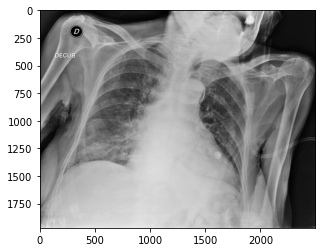

In [ ]:
#Sebelum Augmentasi
import PIL
import matplotlib.pyplot as plt

def predictModel(image_path):
    img = PIL.Image.open(image_path)
    plt.imshow(img)

#print("Data Train",predictModel("/tmp/chest-xray-pneumoniacovid19tuberculosis/train/COVID19/COVID19(0).jpg"))
#print("Data Val",predictModel("/tmp/chest-xray-pneumoniacovid19tuberculosis/val/COVID19/COVID19(566).jpg"))
print("Data Test",predictModel("/tmp/chest-xray-pneumoniacovid19tuberculosis/test/COVID19/COVID19(460).jpg"))

In [ ]:
# TULIS KODE ANDA DISINI

from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
import os

os.makedirs("/tmp/augmentation")
os.makedirs("/tmp/augmentation/train")
batch_size = 32
augmen_gen = ImageDataGenerator(rescale=1 / 255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')
i= 0
for train_aug in augmen_gen.flow_from_directory(
    '/tmp/chest-xray-pneumoniacovid19tuberculosis/train',
    class_mode = 'categorical',
    shuffle=True,
    target_size = (200,200),
    batch_size=batch_size,
    color_mode ='rgb',
    save_to_dir="/tmp/augmentation/train",
    save_format='jpg'
):
   i += 1
   if i > 500:
      break





Found 6326 images belonging to 4 classes.


In [ ]:
# TULIS KODE ANDA DISINI

from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
import os
os.makedirs("/tmp/augmentation/val")

batch_size = 32
augmen_gen = ImageDataGenerator(rescale=1 / 255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')
i= 0
for val_aug in augmen_gen.flow_from_directory(
    '/tmp/chest-xray-pneumoniacovid19tuberculosis/val',
    class_mode = 'categorical',
    shuffle=True,
    target_size = (200,200),
    batch_size= batch_size,
    color_mode ='rgb',
    save_to_dir="/tmp/augmentation/val",
    save_format='jpg'
):

  i += 1
  if i > 500:
      break

Found 38 images belonging to 4 classes.


In [ ]:
# TULIS KODE ANDA DISINI

from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
import os
os.makedirs("/tmp/augmentation/test")

batch_size = 32
augmen_gen = ImageDataGenerator(rescale=1 / 255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')
i= 0
for test_aug in augmen_gen.flow_from_directory(
    '/tmp/chest-xray-pneumoniacovid19tuberculosis/test',
    class_mode = 'categorical',
    shuffle=False,
    target_size = (200,200),
    batch_size=batch_size,
    color_mode ='rgb',
    save_to_dir="/tmp/augmentation/test",
    save_format='jpg'
):
  i += 1
  if i > 500:
      break

Found 771 images belonging to 4 classes.


Data Test None


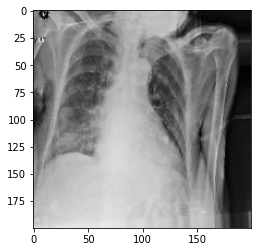

In [ ]:
#contoh augmentasi salah satu data
import PIL
import matplotlib.pyplot as plt

def predictModel(image_path):
    img = PIL.Image.open(image_path)
    plt.imshow(img)

#print("Data Train",predictModel("/tmp/chest-xray-pneumoniacovid19tuberculosis/train/COVID19/COVID19(0).jpg"))
#print("Data Val",predictModel("/tmp/chest-xray-pneumoniacovid19tuberculosis/val/COVID19/COVID19(566).jpg"))
print("Data Test",predictModel("/tmp/augmentation/test/_0_1177926.jpg"))